Submitted By
Nagatheja Sharaf
nasharaf@iu.edu

## Q1
The example code is shown below, here is the description:  
1, About gaussian initializing:  
The Q1 code I use is about bivariate normal distribution: dimension is 2, so it's easy to draw it in the 2D plot.
I generate two groups of gaussian (5000 samples for each) X1, X2 with mean (0,1), (10,10) and covariance cov: [[1, 0], [0, 1]]; [[8, 2], [2, 5]], respectively. 
Then I generate the mixed gaussian data using hyper parameter [0.5,0.5]: 0.5 propotion sampling from X1, and 0.5 propotion sampling from X2.  
2, About deciding ties: actually it is almost impossible to encounter this situation. If there's really such situation that p(good)==p(bad), I will use a random.randint(0,1) to randomly decide a cluster to group it in. (The related code is in Q2's code)  
3, About stopping criteria: it is the 'epsilon' $\epsilon$ variable in my code.  
when running the program in Q2, I realized that $\epsilon$ can be very small (<10^(-10)) after 7~8 iteration. Basically I can choose np.finfo(float).eps (about 2.220446049250313e-16 in my computer) as $\epsilon$'s value, but in Q2's code I choose a larger value to save time. It took so many time to run Q2.  
Still, in Q1, I choose np.finfo(float).eps as my stopping criteria value 'epsilon' $\epsilon$.



After running Q1's code, there will be 3 graphs.   
1: the initializing gaussian.  
2: the mixed gaussian using hyper parameter [0.5,0.5].  
3: the re-built gaussian using EM algorithm. The re-built gaussian's mean(mu), covariance (cov) and hyper-parameter is very close to the original initializing gaussian's parameters, for example:       
mu: [[0.004886969271789644, 0.9959749622749415], [10.076892194178802, 10.07653728538952]]  
cov: [array([[ 1.00979934e+00, -2.18420055e-04],
       [-2.18420055e-04,  1.02354885e+00]]), array([[8.15451555, 1.87571278],
       [1.87571278, 4.81168966]])]  
pc(hyper parameters): [0.5000947942292577, 0.4999052057748092]      

Compared to original gaussian:   
mu: [[0, 1],[10, 10]]  
cov: [[1, 0], [0, 1]]; [[8, 2], [2, 5]]  
hyper parameter: [0.5, 0.5]  

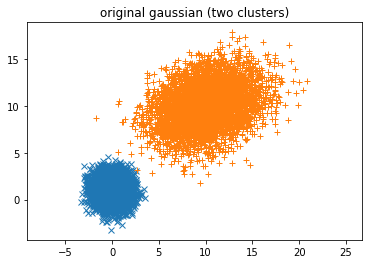

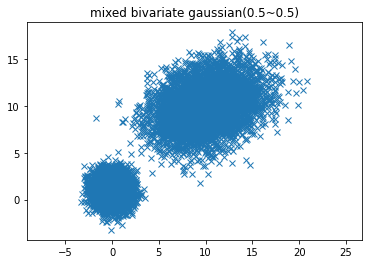

mu: [[0.004886969271789644, 0.9959749622749415], [10.076892194178802, 10.07653728538952]]
cov: [array([[ 1.00979934e+00, -2.18420055e-04],
       [-2.18420055e-04,  1.02354885e+00]]), array([[8.15451555, 1.87571278],
       [1.87571278, 4.81168966]])]
pc(hyper parameters): [0.5000947942292577, 0.4999052057748092]


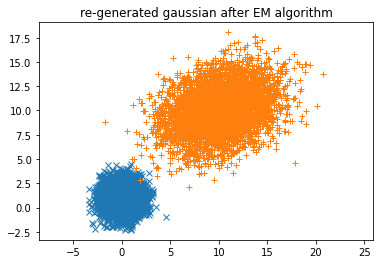

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


def gaussian(x, mu, cov):
    prevent_singular = 10 ** (-7)
    cov += np.eye(len(cov)) * prevent_singular
    x = np.array(x)
    d = len(x)
    part1 = ((2 * np.pi) ** (d / 2)) * (np.linalg.det(cov) ** (1 / 2))
    part2 = (x - mu).T @ np.linalg.inv(cov) @ (x - mu)
    return 1 / part1 * np.exp(-1 / 2 * part2)


# begin

# K: cluster
# D:(x3,y3) with hyper parameter
# epsilon: decide later/tunning later
def em(k, data, find_true_cluster=False):
    d = data.shape[1]
    t = 0

    # if find_true_cluster:
    #     epsilon = np.finfo(float).eps
    # else:
    #     epsilon = 10 ** (-7)

    epsilon = np.finfo(float).eps

    mu = [[]]
    # randomly choose data from one of the dimensions in the cluster,
    # in this part we use 2-dimension,
    # so I did not write for-loop to multi-dimension conditions
    # mu.append([random.choice(x1), random.choice(y1)])
    # mu.append([random.choice(x2), random.choice(y2)])

    # print(mu)
    # example: [[0.6582121042765129, 0.037951280560258094], [8.833723740971031, 10.093595901386399]]

    # cov should append more data in the for-loop
    cov = [[]]  # should be np.eye(d), d=dimension

    # cov should append more data in the for-loop
    # suppose hyperparameter inited as Univariate distribution
    pc = [[]]
    for i in range(0, k):
        pc[0].append(1 / k)
        cov[0].append(np.eye(d))  # d=dimension

    # special case for Q1
    random_float = random.randint(0, len(data) // 2 - 10)
    mu[0].append(data[len(data) // 2 - random_float].tolist())
    mu[0].append(data[len(data) // 2 + random_float].tolist())

    # k: cluster number
    # n: index of data
    while True:
        t = t + 1
        wij = []
        for j in range(0, len(data)):
            w_column = []
            for i in range(0, k):  # 2 should be k, k is cluster index
                test1 = data[j]
                test2 = mu[t - 1][i]
                test3 = cov[t - 1][i]
                w = gaussian(data[j], mu[t - 1][i], cov[t - 1][i]) * pc[t - 1][i]
                sum = 0
                for a in range(0, k):  # 2 should be k, k is cluster index
                    sum += gaussian(data[j], mu[t - 1][a], cov[t - 1][a]) * pc[t - 1][a]
                w = w / sum
                w_column.append(w)
            wij.append(w_column)
        wij = np.array(wij)

        newmu_lst = []
        new_cov = []
        new_pc = []
        for i in range(0, k):  # 2 should be k, k is cluster index
            sum1 = np.zeros([d, 1])
            sum2 = 0
            sum3 = np.zeros([d, d])
            for j in range(0, len(data)):
                test = wij[j][i] * data[j].reshape(-1, 1)
                sum1 += test  # should be a vector
                sum2 += wij[j][i]  # should be a constant
                sum3 += wij[j][i] * (
                        (data[j] - mu[t - 1][i]).reshape(-1, 1) @ (data[j] - mu[t - 1][i]).reshape(-1,
                                                                                                   1).T)  # should be a matrix

            newmu_lst.append((sum1 / sum2).reshape(-1).tolist())
            new_cov.append((sum3 / sum2))
            new_pc.append(sum2 / len(data))

        mu.append(newmu_lst)
        cov.append(new_cov)
        pc.append(new_pc)

        # mu
        # example: [[0.6582121042765129, 0.037951280560258094], [8.833723740971031, 10.093595901386399]]
        sum = 0
        for i in range(0, k):  # 2 should be k, k is cluster index
            sum += np.linalg.norm(np.array(mu[t][i]) - np.array(mu[t - 1][i])) ** 2
        # print(sum)
        if sum <= epsilon:
            break

    print('mu: ' + str(mu[-1]))
    print('cov: ' + str(cov[-1]))
    print('pc(hyper parameters): ' + str(pc[-1]))

    return (mu[-1], cov[-1], pc[-1], wij, t)


if __name__ == '__main__':
    # generate
    mean = [0, 1]
    cov = [[1, 0], [0, 1]]
    x1, y1 = np.random.multivariate_normal(mean, cov, 5000).T
    mean2 = [10, 10]
    cov2 = [[8, 2], [2, 5]]
    x2, y2 = np.random.multivariate_normal(mean2, cov2, 5000).T
    plt.plot(x1, y1, 'x')
    plt.plot(x2, y2, '+')
    plt.axis('equal')
    plt.title('original gaussian (two clusters)')
    plt.show()

    # mixture
    hypaer_parameter = [0.5, 0.5]
    x3 = np.concatenate((x1, x2), axis=0)
    y3 = np.concatenate((y1, y2), axis=0)
    data = np.concatenate((np.array(x3).reshape(-1, 1), np.array(y3).reshape(-1, 1)), axis=1)
    plt.figure()
    plt.plot(x3, y3, 'x')
    plt.axis('equal')
    plt.title('mixed bivariate gaussian(0.5~0.5)')
    plt.show()

    (mu, cov, pc, wij, t) = em(k=2, data=data)
    mean1 = mu[0]
    cov1 = cov[0]
    x1, y1 = np.random.multivariate_normal(mean1, cov1, (int)(10000 * pc[0])).T
    mean2 = mu[1]
    cov2 = cov[1]
    x2, y2 = np.random.multivariate_normal(mean2, cov2, (int)(10000 * pc[1])).T
    plt.plot(x1, y1, 'x')
    plt.plot(x2, y2, '+')
    plt.axis('equal')
    plt.title('re-generated gaussian after EM algorithm')
    plt.show()


## Q2: EM algorithm and real world's dataset
❗❗❗  
Due to this course's assignment's format restriction (.ipynb ONLY), I am only allowed to upload a single jupyter-notebook file. Running Q2's code needs these files in the same directory:
Dataset.data, from Ringnorm Data Set
ionosphere.data, from Ionosphere Data Set  
❗❗❗

Running Q2's code may take over 1 hour.

About Q2's results:
1, For Ionosphere Data Set: Compared to K=3,4,5: K=2 leads to the best case result(10% or so error rate), which is quite to this dataset's original groups. As K increases from K=2 to K=3,4,5, the error rate whisker box 'shrinks', which indicated a more stable error rate but not so good as K=2(considering K=2 computes very error rate).
2, For Ringnorm Data Set: this dataset is better grouped compared to Ionosphere Data Set, so the overall error rate is very, very small.
3, For two datasets, regarding iteration times:  
when K increases from 2 to 5, the value of iterations also slightly increases.


running Dataset.data
k= 2    error rate: 0.042702702702702704
k= 2    error rate: 0.4987837837837838
k= 2    error rate: 0.02189189189189189
k= 2    error rate: 0.02189189189189189
k= 2    error rate: 0.015405405405405406
k= 2    error rate: 0.023108108108108108
k= 2    error rate: 0.03567567567567568
k= 2    error rate: 0.02216216216216216
k= 2    error rate: 0.047027027027027025
k= 2    error rate: 0.015540540540540541
k= 2    error rate: 0.05027027027027027
k= 2    error rate: 0.033783783783783786
k= 2    error rate: 0.022567567567567566
k= 2    error rate: 0.0222972972972973
k= 2    error rate: 0.015135135135135135
k= 2    error rate: 0.020945945945945947
k= 2    error rate: 0.01972972972972973
k= 2    error rate: 0.02337837837837838
k= 2    error rate: 0.015810810810810812
k= 2    error rate: 0.049189189189189186
k= 3    error rate: 0.014864864864864866
k= 3    error rate: 0.015135135135135135
k= 3    error rate: 0.015
k= 3    error rate: 0.01608108108108108
k= 3    error rate: 0.

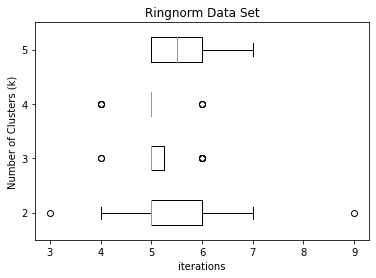

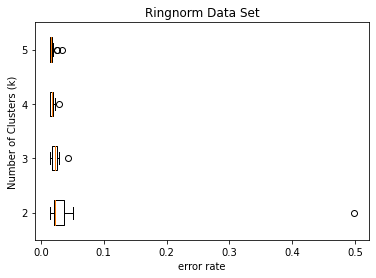

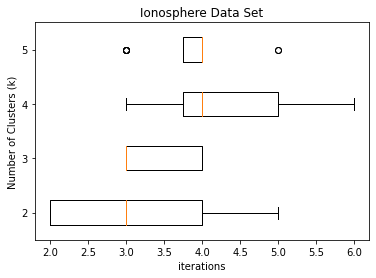

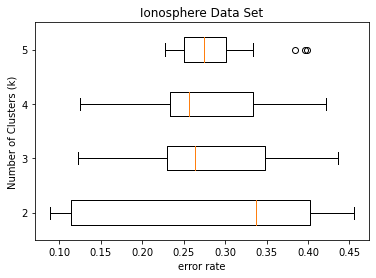

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import re
import random


def gaussian(x, mu, cov):
    prevent_singular = 10 ** (-7)
    cov += np.eye(len(cov)) * prevent_singular
    x = np.array(x)
    d = len(x)
    part1 = ((2 * np.pi) ** (d / 2)) * (np.linalg.det(cov) ** (1 / 2))
    part2 = (x - mu).T @ np.linalg.inv(cov) @ (x - mu)
    return 1 / part1 * np.exp(-1 / 2 * part2)


# begin

# K: cluster
# D:(x3,y3) with hyper parameter
# epsilon: decide later/tunning later
def em(k, data, find_true_cluster=False):
    d = data.shape[1]
    t = 0

    if find_true_cluster:
        # epsilon = np.finfo(float).eps
        epsilon = 10 ** (-4)
    else:
        epsilon = 10 ** (-1)
    # epsilon = 10 ** (-1)

    mu = [[]]
    # randomly choose data from one of the dimensions in the cluster,
    # in this part we use 2-dimension,
    # so I did not write for-loop to multi-dimension conditions
    # mu.append([random.choice(x1), random.choice(y1)])
    # mu.append([random.choice(x2), random.choice(y2)])

    # print(mu)
    # example: [[0.6582121042765129, 0.037951280560258094], [8.833723740971031, 10.093595901386399]]

    # cov should append more data in the for-loop
    cov = [[]]  # should be np.eye(d), d=dimension

    # cov should append more data in the for-loop
    # suppose hyperparameter inited as Univariate distribution
    pc = [[]]
    for i in range(0, k):
        pc[0].append(1 / k)
        cov[0].append(np.eye(d))  # d=dimension
        random_index = random.randint(0, len(data) - 1)
        if find_true_cluster:
            mu[0].append(data[0 + i].tolist())
        else:
            mu[0].append(data[random_index].tolist())

    # k: cluster number
    # n: index of data
    while True:
        t = t + 1
        wij = []
        for j in range(0, len(data)):
            w_column = []
            for i in range(0, k):  # 2 should be k, k is cluster index
                test1 = data[j]
                test2 = mu[t - 1][i]
                test3 = cov[t - 1][i]
                w = gaussian(data[j], mu[t - 1][i], cov[t - 1][i]) * pc[t - 1][i]
                sum = 0
                for a in range(0, k):  # 2 should be k, k is cluster index
                    sum += gaussian(data[j], mu[t - 1][a], cov[t - 1][a]) * pc[t - 1][a]
                w = w / sum
                w_column.append(w)
            wij.append(w_column)
        wij = np.array(wij)

        newmu_lst = []
        new_cov = []
        new_pc = []
        for i in range(0, k):  # 2 should be k, k is cluster index
            sum1 = np.zeros([d, 1])
            sum2 = 0
            sum3 = np.zeros([d, d])
            for j in range(0, len(data)):
                test = wij[j][i] * data[j].reshape(-1, 1)
                sum1 += test  # should be a vector
                sum2 += wij[j][i]  # should be a constant
                sum3 += wij[j][i] * (
                        (data[j] - mu[t - 1][i]).reshape(-1, 1) @ (data[j] - mu[t - 1][i]).reshape(-1,
                                                                                                   1).T)  # should be a matrix

            newmu_lst.append((sum1 / sum2).reshape(-1).tolist())
            new_cov.append((sum3 / sum2))
            new_pc.append(sum2 / len(data))

        mu.append(newmu_lst)
        cov.append(new_cov)
        pc.append(new_pc)

        # mu
        # example: [[0.6582121042765129, 0.037951280560258094], [8.833723740971031, 10.093595901386399]]
        sum = 0
        for i in range(0, k):  # 2 should be k, k is cluster index
            sum += np.linalg.norm(np.array(mu[t][i]) - np.array(mu[t - 1][i])) ** 2
        # print(sum)
        if sum <= epsilon:
            break

    # print(mu[-1])
    # print(cov[-1])
    # print(pc[-1])
    # temp = mu[-1]

    return (mu[-1], cov[-1], pc[-1], wij, t)


def calculate_error(mu, wij, k, y_label, true_cluster_center1, true_cluster_center2):
    cluster_assign = []
    for i in range(0, k):
        dist1 = np.linalg.norm(np.array(mu[i]) - np.array(true_cluster_center1))
        dist2 = np.linalg.norm(np.array(mu[i]) - np.array(true_cluster_center2))
        if dist1 == dist2:
            cluster_assign.append(random.choice([0, 1]))
        if dist1 > dist2:
            cluster_assign.append(0)
        else:
            cluster_assign.append(1)

    predict_cluster = []
    for i in range(0, len(wij)):
        predict_cluster.append(cluster_assign[np.argmax(wij[i])])

    # print(predict_cluster)
    # print(y_label)
    # print('done')

    TT = 0
    FF = 0

    for i in range(0, len(y_label)):
        if predict_cluster[i] == y_label[i]:
            TT += 1
        else:
            FF += 1
    err = min(TT, FF)
    print('k= ' + str(k) + '    error rate: ' + str(err / len(y_label)))
    return err / len(y_label)


def run(dataset, data, y_label):
    true_cluster_mu1 = em(k=2, data=data, find_true_cluster=True)[0][0]
    true_cluster_mu2 = em(k=2, data=data, find_true_cluster=True)[0][1]

    iterations_whisker = []
    errors_whisker = []
    for k in range(2, 6):
        iterations_lst = []
        err_rate_lst = []
        for iter in range(0, 20):
            (mu, cov, pc, wij, iterations) = em(k=k, data=data)
            iterations_lst.append(iterations)
            err_rate = calculate_error(mu=mu, wij=wij, k=k, y_label=y_label, true_cluster_center1=true_cluster_mu1,
                                       true_cluster_center2=true_cluster_mu2)
            err_rate_lst.append(err_rate)
        iterations_whisker.append(iterations_lst)
        errors_whisker.append(err_rate_lst)

    print('done for ' + dataset)
    return (iterations_whisker, errors_whisker)


def draw(iterations_whisker, errors_whisker, dataset):
    plt.figure()
    plt.boxplot(iterations_whisker, vert=False, labels=["2", "3", "4", "5"])
    plt.xlabel('iterations')
    plt.ylabel('Number of Clusters (k)')
    plt.title(dataset)
    # plt.show()
    plt.savefig(dataset + '_whisker1.png')

    plt.figure()
    plt.boxplot(errors_whisker, vert=False, labels=["2", "3", "4", "5"])
    plt.xlabel('error rate')
    plt.ylabel('Number of Clusters (k)')
    plt.title(dataset)
    # plt.show()
    plt.savefig(dataset + '_whisker2.png')


if __name__ == '__main__':

    dataset = 'Dataset.data'
    data = []
    y_label = []
    with open(dataset, 'r') as f:
        lines = f.readlines()
        for line in lines:
            white_space_regex = re.compile(r'[ ]+')  # at least one white space
            res = white_space_regex.split(line)
            data_row = []
            for i in range(0, len(res) - 1):
                if len(res[i]) != 0:
                    test = res[i]
                    data_row.append(float(res[i].rstrip()))
            data.append(data_row)
            y_label.append(int(res[-1].replace('\n', '')))  # the last element is y_label

    data = np.array(data)
    print('running ' + dataset)

    (iterations_whisker1, errors_whisker1) = run(dataset=dataset, data=data, y_label=y_label)

    dataset = 'ionosphere.data'
    data = []
    y_label = []
    with open(dataset, 'r') as f:
        lines = f.readlines()
        for line in lines:
            row = []
            columns = line.split(',')
            data_column = columns[:-1]
            for item in data_column:
                row.append(float(item.rstrip()))
            y_label.append(columns[-1].replace('\n', ''))
            data.append(row)

    data = np.array(data)
    print('running ' + dataset)

    for i in range(0, len(y_label)):
        if y_label[i] == 'g':
            y_label[i] = 0
        else:
            y_label[i] = 1

    (iterations_whisker2, errors_whisker2) = run(dataset=dataset, data=data, y_label=y_label)

    draw(iterations_whisker=iterations_whisker1, errors_whisker=errors_whisker1, dataset='Ringnorm Data Set')
    draw(iterations_whisker=iterations_whisker2, errors_whisker=errors_whisker2, dataset='Ionosphere Data Set')


### Problem 3: Algorithm Design

#### Problem 3.1
3.1 Problem
Describe a (d+p) time technique for determining the longest prefix of P that is a substring of D given a text D and a pattern P. D and P have lengths of d and p, respectively.
We can tackle this task in the following manner to complete it.
We'll calculate the fail array the same way we did with the KMP technique.
We can figure out how many spots we can move in the provided text using this method.
Then, using a while loop, we can loop through the text and identify the biggest substring in the text that is also a prefix of the provided pattern.
As a result, the complexity criteria are satisfied.

In [2]:
def compute_kmp_fail ( P ) :
    m = len( P )
    fail = [0] * m
    j = 1
    k = 0
    while j < m :
     if P [ j ] == P [ k ]:
         fail [ j ] = k +1
         j += 1
         k += 1
     elif k > 0:
         k = fail [k -1]
     else :
         j += 1
    return fail

# KMP
def find_kmp(T, P):
    
    n, m = len(T), len(P)
    
    flag = True
    start = 0
    end = 0
    prfix = 0
    count = 0
    
    if m == 0:
        return 0
    
    fail = compute_kmp_fail(P) 
#     print(fail)
    
    j=0
    k=0
    
    while j<n:
        
        if T[j] == P[k]:
            
            #incrementing counter if character found in the pattern 
            count += 1
            
            #complete pattern found and return position
            if k == m-1:
                return T[start:end + 1], m
            
            #setting count as 1 for every first character found in the pattern
            if flag == True:
                count = 1
                flag = False
            
            #update start && end value of the string as per the updated longest prefix
            #updating the longest prefix if the count value is greater than previous longest prefix
            if prfix <= count:
                start = j - (count - 1)
                end = j + 1
                prfix = count
            
            j+=1
            k+=1
                        
        elif k>0:
            flag = True
            k=fail[k-1]
        
        else:
            j+=1
    
    #if longest prefix is 0
    if(prfix == 0):
        return "NULL", 0
    
    return T[start:end],prfix



T = "nagateja"
P = "teja"

print(find_kmp(T,P))


('teja', 4)


#### Problem 3.2
X, Y, and Z are three arrays with m elements apiece. Define an O(m2logm)-time algorithm to detect if there are any numbers, x in X, y in Y, and z in Z, such that t = x+y+z for an arbitrary integer t.
We'll need to sort one of the arrays in a binary tree to complete this assignment. We can improve the lookup time while looping on the other two arrays by doing so.
Steps:
Make a binary tree out of a single array.
This is a lower order complexity operation because it is merely a mlogm operation.
To discover the last element, loop through the other two arrays and use binary search.



In [3]:
def sum(X, Y, Z, t):
    Z.sort()
    
    for x in X:
        for y in Y:
            key = (t - x - y)
            z = bin_search(Z, key)
            if((key - z) == 0):
                return x, y, z, t

    return x, y, z, -1

def bin_search(Z, z):
    low = 0
    high = len(Z) - 1  
    while(low <= high):
        mid = (low + high) // 2
        if Z[mid] < z:
            low = mid + 1            
        elif Z[mid] > z:
            high = mid - 1
        else:
            return Z[mid]
    return -1
X, Y, Z = [1,2,3,4,5], [2,3,4,5,6], [8,3,4,6,7,5,]
t = 19
print(sum(X,Y,Z,t))

(5, 6, 8, 19)


#### Problem 3.3
Analyze the running time of an efficient approach for deleting a string from a compressed trie.

Deletion from a 'compressed trie' is a time-consuming process that requires many checks.

Check if the given string is present in the 'compressed trie'.

1, If it doesn't exist, it should be returned.
2, If it exists, the algorithm should start deleting the string. The compressed trie is still a compressed trie (after deleting).

About deleting the string, there are two conditions to consider:

1, The string's last parent node has 3 or more children: only need to delete the destination child node (contains the string). 
2, The string's last parent node has 2 children: delete the destination child node (contains the string) first, then merge the other child node into its parent node.
After completing the deletion, it returns a compressed trie.
               
Time complexity analyze:
1, using BFS algorithm to find all the nodes. The time complexity is O(mn), m is the depth of string in the trie, n is the number of children in each corresponding parent nodes.
2, Delete the string: it takes O(1) time. Only one operation of nodes is included.
3, So the overall time complexity is O(mn)+O(1)=O(mn).

In [1]:
# Below construction of tree has been taken from below url
# https://github.com/bzamecnik/python-hash-trie/blob/master/hash_trie/hash_trie.py


class Trie(object):
    def __init__(self, words, compressed=False):
        def uncompressed_from_list(words):
            'Creates a basic uncompressed trie from a sorted list of words.'
            root = ({}, False)
            for word in words:
                node, is_terminal = root
                size = len(word)
                for i, char in enumerate(word):
                    is_terminal = i == size - 1
                    if char not in node:
                        node[char] = ({}, is_terminal)
                    node, is_terminal = node[char]
            return root

        def compress_subtrie(root, prefix=''):
            '''

            Compresses this trie into another object, ie. collapses each sequence
            of non-terminal nodes with one child into a single nodes whose key is
            concatenation of the original keys.

            The method is idempotent, ie. calling it repeatedly produces the same
            result.

            The implementation is recursive (first a top-down pass, then bottom-up
            backtracking).
            
            Compresses a (sub)trie with given key prefix. In the top-down pass
            the original keys in single-child sequences are concatenated and in
            the backtracking the result is returned back.
            '''
            children, is_terminal = root
            child_count = len(children)
            if child_count == 0:
                # not interesting, the base case
                return root, prefix
            elif child_count == 1:
                for key, child in children.items():
                    # just on iteration to obtain the single key-value pair
                    next_prefix = key if is_terminal else prefix + key
                    comp_child, comp_key = compress_subtrie(child, next_prefix)
                    comp_children = {comp_key: comp_child} \
                        if prefix == '' or is_terminal else comp_child[0]
                    return (comp_children, comp_child[1] or is_terminal), \
                        prefix if is_terminal else comp_key
            else: # child_count > 1
                # not interesting, just compress each child
                comp_children = {}
                for key, child in children.items():
                    comp_child, comp_key = compress_subtrie(child, key)
                    comp_children[comp_key] = comp_child
                return (comp_children, is_terminal), prefix
        
        root = uncompressed_from_list(words)
        if compressed:
            root = compress_subtrie(root)[0]
        
        self.root = root
        self.is_compressed = compressed

    def __contains__(self, word):
        'Tests whether a given words is contained in the trie.'
        
        def in_trie(word, trie):
            children, is_terminal = trie
            word_length = len(word)
            if word_length == 0:
                return is_terminal
            for i in range(word_length if self.is_compressed else 1):
                key = word[:i+1]
                child = children.get(key)
                if child is not None:
                    return in_trie(word[i+1:], child)
            return False
        
        return in_trie(word, self.root)

# ------- Algorithm to remove a word from the compressed Trie----------
    # REMOVAL OF A WORD FROM THE TRIE
    # TRAVERSE THE TREE ALONG THE WORD
    # REMOVE THE NODE IF IT IS TERMINAL NODE      
    def remove_word(self,word):
        def remove(word,trie):
            children, is_terminal = trie
            word_length = len(word)
            if word_length == 0:
                return is_terminal
            for i in range(word_length if self.is_compressed else 1):
                key = word[:i+1]
                child = children.get(key)
                if child is not None:
                    if len(child[0])==0:
                        del children[key]
                        return True
                    return remove(word[i+1:],child)
            return False
        success=remove(word, self.root)
        if success:
            print('successfully deleted',word)
        else:
            print('cannot find',word)
# -------------------------End----------------------------------------------

    def print_trie(self):
        def print_subtree(root, level):
            children, _ = root
            for key in sorted(children.keys()):
                child = children[key]
                _, is_terminal = child
                print(level * ('*' if is_terminal else '-'), key)
                print_subtree(child, level + 1)
        print_subtree(self.root, 1)

    def count_nodes(self, only_terminal=False):
        def _count_nodes(trie, only_terminal):
            children, is_terminal = trie
            if only_terminal:
                count = 1 if is_terminal else 0
            else:
                count = 1
            for _, child in children.items():
                count = count + _count_nodes(child, only_terminal)
            return count
        return _count_nodes(self.root, only_terminal)

if __name__ == '__main__':

    words = ['camera','book', 'boar','boston','bookish']
    trie = Trie(words,True)
    trie.print_trie()
    trie.remove_word('bookish')
    trie.print_trie()

- bo
** ar
** ok
*** ish
** ston
* camera
successfully deleted bookish
- bo
** ar
** ok
** ston
* camera
